# **Homework 3 Practicum**
# Version 1.0 (October 4, 2024)

<font color='blue'> TODO:</font> Trevor Black (tblack20)

Instructions:
This notebook has two parts:

Part 1: Implement Perceptron using Rosenblatt's Algorithm.

Part 2: Implement SVM using quadratic solver.

Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). At the beginning of each part, we will bullet the expected deliverables for you to complete.

Please <font color='blue'>make a copy of this notebook in your own drive</font> before you make any edits. You can do so through File -> Save a copy in Drive



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.datasets import make_blobs,make_moons
from sklearn.metrics import confusion_matrix, precision_score, recall_score

np.random.seed(42)


# **PART I: Perceptron**

Things to do in this part:
1. Implement fit and predict methods of Perceptron class
2. Answer the questions


In this section, we explore the implementation and evaluation of a Perceptron, a foundational algorithm in machine learning for binary classification tasks. The Perceptron model mimics the functioning of a neuron in the human brain, making decisions based on linear combinations of input features.

We will generate synthetic datasets using the make_blobs function, varying the standard deviation of the clusters to observe how this affects the Perceptron's performance. The notebook covers:

Dataset Generation: Creating synthetic datasets with two classes using varying standard deviations.

Data Preprocessing: Splitting the dataset into training and test sets and applying feature scaling for optimal model performance.

Model Training: Training the Perceptron on the scaled training data.
Evaluation: Making predictions on the test set and calculating the accuracy of the model.

Visualization: Plotting decision boundaries to visually assess how well the Perceptron separates the two classes.

By the end of this notebook, you'll gain insights into the behavior of the Perceptron under different conditions and understand its strengths and limitations in handling linearly separable data.





In [2]:
class Perceptron:
    def __init__(self,  n_iterations=1000):
        """
        Initialize the Perceptron model.

        Parameters:
        n_iterations (int): Number of training iterations.
        """
        self.n_iterations = n_iterations
        self.beta0 = 0  # bias term
        self.beta = None  # weights


    def fit(self, X, y):
        """
        Fit the Perceptron model to the training data.
        Note: Save self.beta0 and self.beta every 100 iterations for plotting decision boundaries.

        Parameters:
        X (numpy.ndarray): Training data.
        y (numpy.ndarray): Target labels.
        """
        n_samples, n_features = X.shape
        self.beta = np.zeros(n_features)

        # TODO ...WRITE YOUR CODE HERE...
        
        for iter in range(self.n_iterations):
            for i in range(n_samples):
                # slide 8.9 => sign(beta0 + X_i^T dot beta)
                func = self.beta0 + np.dot(X[i], self.beta)
                y_pred = np.sign(func)

                if y[i] != y_pred:
                    learning_rate = 1 # slide 8.10 says set to 1 is fine

                    self.beta += learning_rate * y[i] * X[i]
                    self.beta0 += learning_rate * y[i]

        


    def predict(self, X):
        """
        Predict the labels for the given data.

        Parameters:
        X (numpy.ndarray): Input data.

        Returns:
        numpy.ndarray: Predicted labels.
        """
        # TODO ...WRITE YOUR CODE HERE...
        
        func_outputs = self.beta0 + np.dot(X, self.beta)
        y_pred = np.where(func_outputs > 0, 1, -1)
        return y_pred


    def accuracy(self, y_true, y_pred):
        """
        Calculate the accuracy of the predictions.

        Parameters:
        y_true (numpy.ndarray): True labels.
        y_pred (numpy.ndarray): Predicted labels.

        Returns:
        float: Accuracy.
        """
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    def plot_final_decision_boundary(self,X, y):
      """
      Visualize the final decision boundary of the trained perceptron.

      Parameters:
      X (numpy.ndarray): Input data.
      y (numpy.ndarray): Target labels.
      """
      plt.figure(figsize=(8, 6))

      # Plotting the data points
      plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

      # Plotting the decision boundary
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
      Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)

      plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
      plt.title('Decision Boundary of the Perceptron')
      plt.xlabel('X')
      plt.ylabel('y')
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.axhline(0, color='black', lw=0.8)
      plt.axvline(0, color='black', lw=0.8)
      plt.grid()
      plt.show()



std_dev=1 Accuracy: 1.0


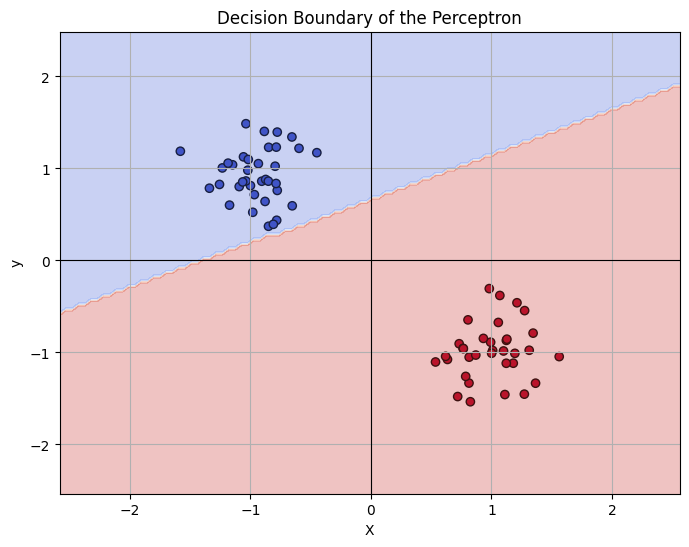

std_dev=2 Accuracy: 1.0


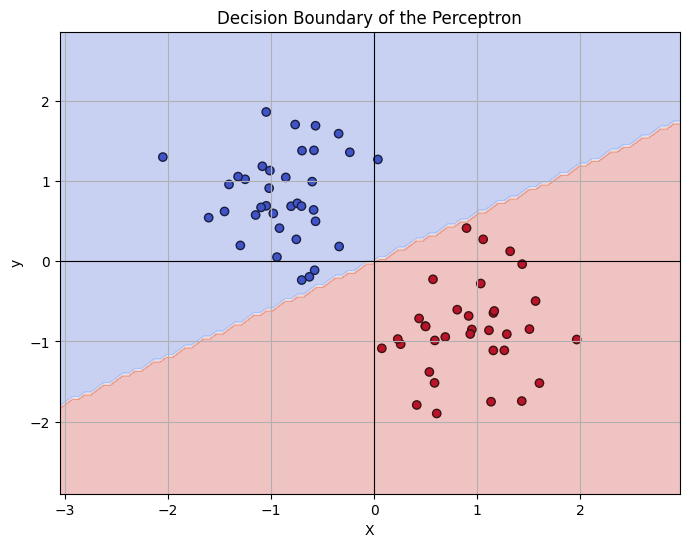

std_dev=3 Accuracy: 0.9333333333333333


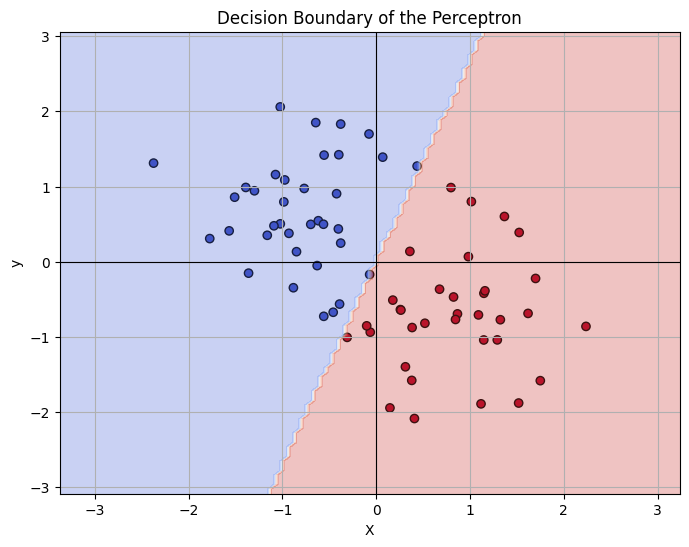

std_dev=4 Accuracy: 0.9


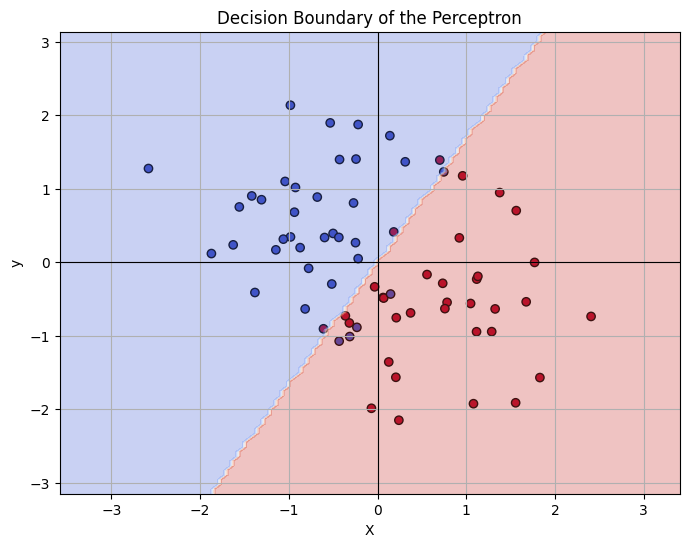

std_dev=5 Accuracy: 0.8666666666666667


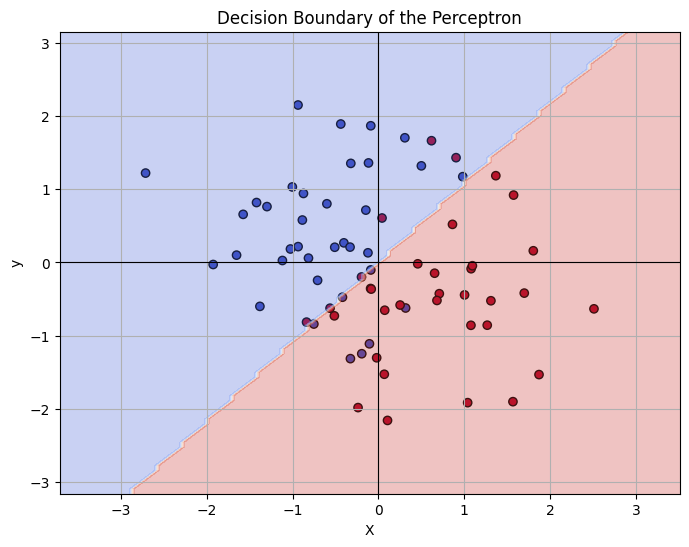

std_dev=6 Accuracy: 0.7666666666666667


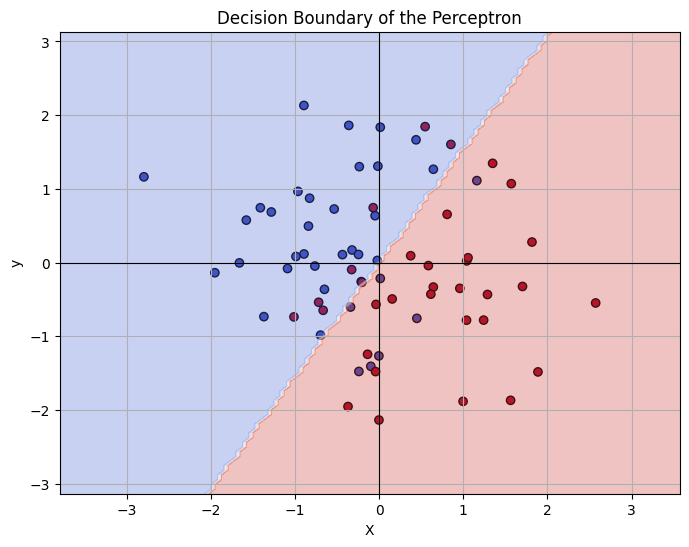

std_dev=7 Accuracy: 0.7666666666666667


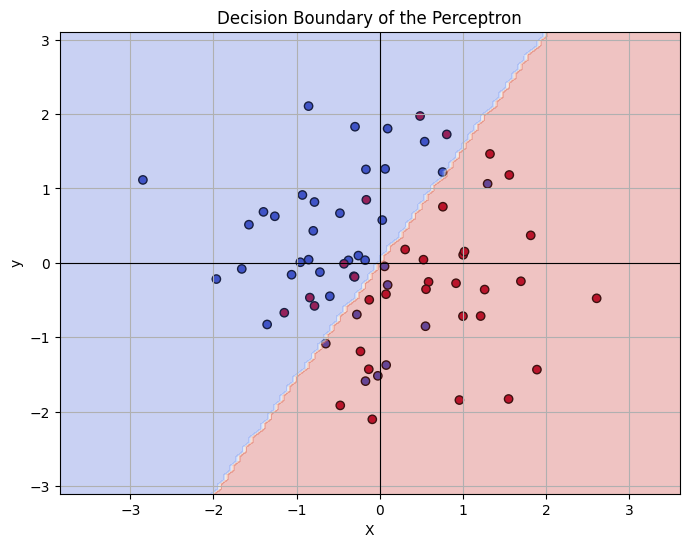

In [3]:
#The code iterates over a range of standard deviations to generate synthetic datasets and then trains and evaluates a Perceptron model on each dataset.
for std_dev in range(1,8):
  # Generate synthetic dataset
  X, y = make_blobs(n_samples=100, centers=2 ,cluster_std=std_dev, random_state=42)

  # Convert labels to -1 and 1
  y = np.where(y == 0, -1, 1)

  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Feature scaling
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  perceptron = Perceptron( n_iterations=1000)
  perceptron.fit(X_train_scaled, y_train)

  # Make predictions
  predictions = perceptron.predict(X_test_scaled)
  acc = perceptron.accuracy(predictions, y_test)

  print(f"std_dev={std_dev} Accuracy: {acc}")
  # Plot decision boundary
  perceptron.plot_final_decision_boundary(X_train_scaled, y_train)


## **Question 1:** How does the perceptron adapt to different levels of data complexity? Also, discuss its performance and factors that can influence it?

<font color='blue'>
    TODO: replace this cell with your answer
</font>

As the standard deviation of the data set increases, the accuracy goes down. This is an inevitability with the model as there is no way to split the data with a hyperplane to perfectly define regions of red versus blue points. Otherwise, the model does a good job of splitting the data as best as is possible. In situations where it is possible to split the data, it does so with perfect accuracy (though it has not chosen the best line that maximizes the margin yet). In situations where it is impossible, it does a very good job still of splitting the data. Additionally, as the standard deviation in the data sets increases, the hyperplane maximizes the 'margin' (though the margin is negative) more, even without directly implementing it. This is because it is encouraged to do a better job at splitting the data continually, rather than being satisfied as soon as it reaches 100% accuracy, even if it's found solution isn't the best. 

The model will settle on an answer quicker with less standard deviation. Especially when there is a possible solution, guaranteeing all data points are correctly classified. This is because once it finds a working model, it does not modify it further. In general, the more accurate the model, the fewer adjustments it makes, so it runs quicker on less complex data. When the standard deviation is too high, the model goes in circles, as the misclassified data points play tug-of-war against each other on the model, each trying to be correctly classified in opposition to the other misclassified points.

Iterations=100, Accuracy: 0.767


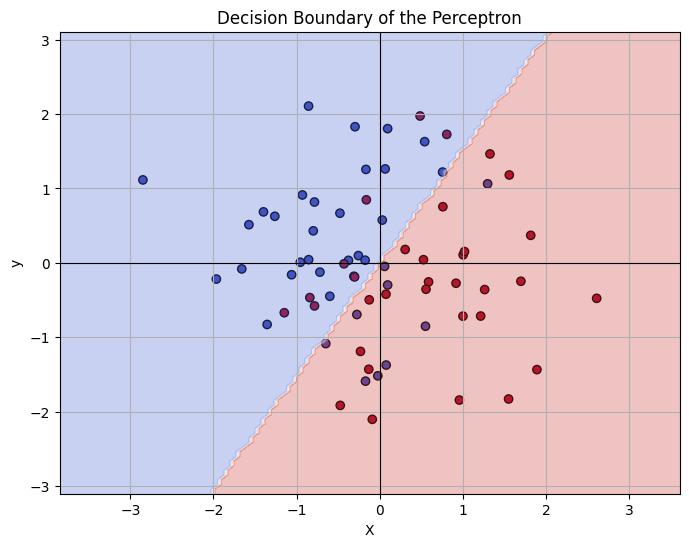

Iterations=300, Accuracy: 0.867


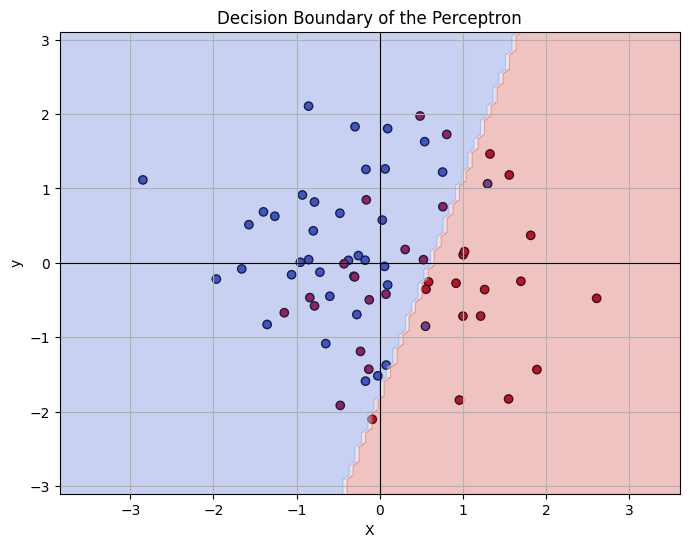

Iterations=500, Accuracy: 0.767


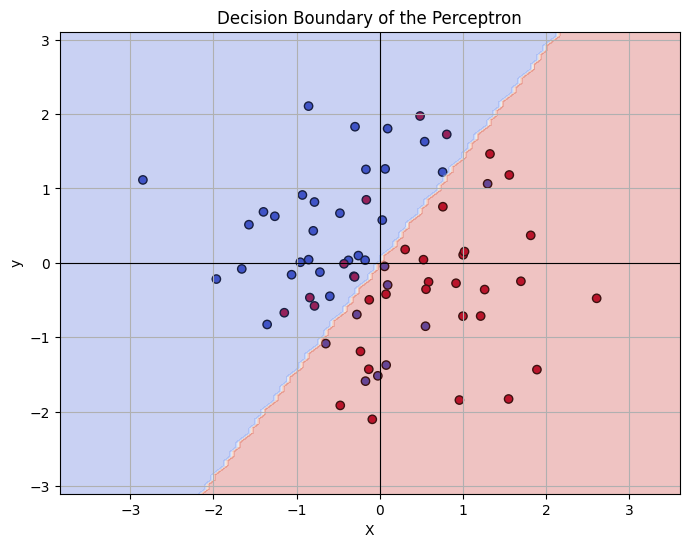

Iterations=700, Accuracy: 0.833


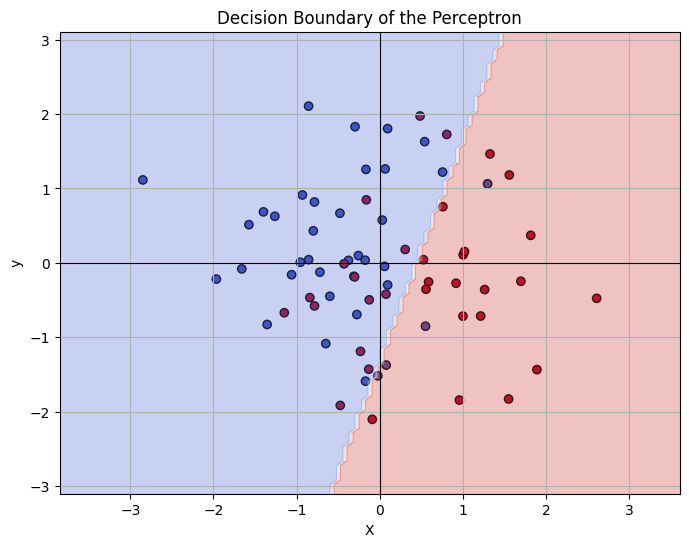

Iterations=900, Accuracy: 0.833


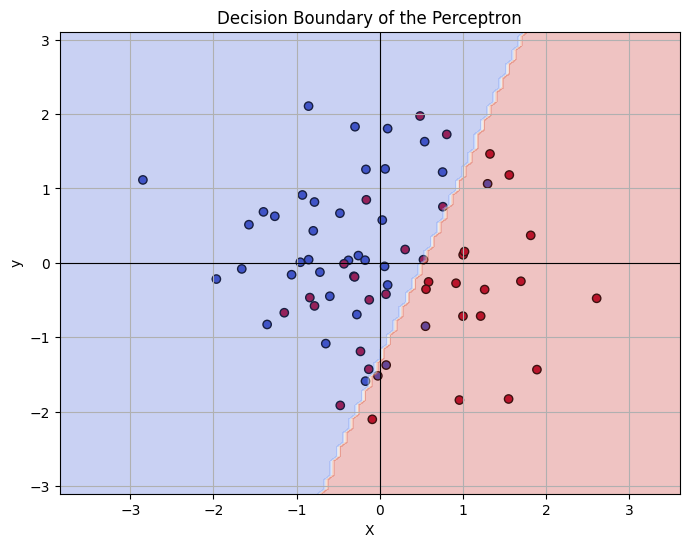

In [4]:
def test_perceptron():
  """
    Test the Perceptron implementation on a synthetic dataset.

    This function generates a synthetic dataset, trains a Perceptron model,
    evaluates its accuracy, and visualizes the decision boundaries.
  """
  # Generate synthetic dataset
  X, y = make_blobs(n_samples=100, centers=2 ,cluster_std=7.0, random_state=42)

  # Convert labels to -1 and 1
  y = np.where(y == 0, -1, 1)

  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Feature scaling
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  for iter in range(100,1000,200):

    # Create and train the Perceptron
    perceptron = Perceptron(n_iterations=iter)
    perceptron.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = perceptron.predict(X_test_scaled)
    acc = perceptron.accuracy(predictions, y_test)

    print(f"Iterations={iter}, Accuracy: {acc:.3f}")
    perceptron.plot_final_decision_boundary(X_train_scaled, y_train)

test_perceptron()

## **Question 2:**  Based on the visualizations, discuss the strengths and limitations of the Perceptron model in this context. What factors contribute to its effectiveness or ineffectiveness in separating the classes? Do you have any further suggestions ?

<font color='blue'>
    TODO: replace this cell with your answer
</font>

The model's accuracy fluctuated when changing the number of inputs. This is because the data too complex for the classifier, so it mathematically cannot model the data perfectly. It plays a game of tug-of-war, where the misclassified points push the model to correctly classify them, but in doing so it misclassifies other points. These other points repeat the process, creating an infinite loop of reclassification leading to a fluctuating accuracy. Regardless of this, the model still did a good job of splitting the data to most accurately classify all of the points.

To dampen this effect and make the perceptron eventually settle on a value, the learning rate could be decreased over time so that later iterations have less influence on the final outcome.


# **PART II: SVM**
Things to do in this part:
1. Implement fit and predict methods of SVM class.
1. Implement non-linear kernel.
2. Answer the discusstion question.


In this part, you will implement the dual problem of the SVM optimization problem. As we have seen in class, the goal SVM is to find the optimal hyperplane that maximizes the margin and minimizes the misclassification, which can be formulated as the following (primal) optimization problem:

$$
\begin{aligned}
\min _{\vec{\beta},\beta_0} & \frac{1}{2}\|\beta\|^2+C \sum_{i=1}^n \xi_i \\
\text { s.t. } & y_i\left(\vec{x}_i^T \vec{\beta}+\beta_0\right) \geq 1-\xi_i, \quad i=1, \ldots, n \\
& \xi_i \geq 0, \quad i=1, \ldots, n
\end{aligned}
$$

Instead of solving the primal problem, we can solve **dual** optimization problem instead:
$$
\begin{aligned}
\max _\alpha & \sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \vec{x}_i^T \vec{x}_j \\
\text { s.t. } & 0 \leq \alpha_i \leq C, \quad i=1, \ldots, n \\
& \sum_{i=1}^n \alpha_i y_i=0
\end{aligned}
$$

You notice the above equations is a quadratic programming problem. Specifically, the quadratic programming problem can be written as:

$$
\begin{array}{ll}
\operatorname{minimize} & (1 / 2) x^T P x+q^T x \\
\text { subject to } & G x \preceq h \\
& A x=b
\end{array}
$$
Please see the `cvxopt` documentation for more information: https://cvxopt.org/userguide/coneprog.html#quadratic-programming


Your task is to specify the matrices/vectors $P$, $q$, $G$, $h$, $A$, and $b$ for the dual optimization problem of the SVM. You will specify those matrics/vectors in the `fit()` function:

```python
def fit(...):
    ...
    P = ...
    q = ...
    G = ...
    h = ...
    A = ...
    b = ...
    # solve QP problem
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    ...
```

 You don't need to provide the expression of these matrices/vector, but we highly recommend you write them down, this will help you to understand/resolve some of the issues you may encounter during the implementation.

For the quadratic solver, we will use the `cvxopt` library to solve this quadratic programming problem.




Use the following command to install the `cvxopt` library:
```bash
!pip install cvxopt
```
or
```bash
!conda install -c conda-forge cvxopt
```

In [ ]:
!pip install cvxopt

In [5]:
import cvxopt # The optimization package for Quadratic Programming
cvxopt.solvers.options['show_progress'] = False

### Synthetic Dataset
We use the moons dataset from `sklearn` to test/visualize the SVM implementation. We pro

In [6]:
X, y = make_moons (n_samples = 300, noise = 0.15, random_state = 10)
y = y*2-1.0 # convert the labels from {0,1} to {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=10)

def plot_svm (clf, X, y, axes=[-2, 3, -2, 2]):
    """
    Generate a simple plot of SVM including the decision boundary, margin, and its training data

    Parameters
    ----------
    clf: your classifier handle
    X: feature matrix shape(m_samples, n_features)
    y: label vector shape(m_samples, )
    axes: (optional) the axes of the plot in format [xmin, xmax, ymin, ymax]
    """
    # Create a mesh grid based on the provided axes (100 x 100 resolution)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s) # create a mesh grid
    X_mesh = np.c_[x0.ravel(), x1.ravel()] # convert all mesh points into 2-D points
    y_pred = clf.predict(X_mesh).reshape(x0.shape) # predict then covert back to the 2-D
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class +1")
    # Plot out the support vectors (in red)
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    # Plot decision boundary and margins
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

You will need to provide the code for the kernel functions. To help you get started, the Linear Kernel (simply just a dot product) has been provided to you. You will need to provide the code for polynomial kernel and rbf kernel in the kernel trick question.
These kernel functions will be called in the SVM class.

In [7]:
# Linear Kernel
def linear_kernel(u, v):
    return np.dot(u, v)

In [111]:
class MySVM(object):
    """The Implementation of the SVM class"""

    def __init__(self, kernel=linear_kernel, C=1):
        self.kernel = kernel # the kernel function used; this is a function and can be called
        self.C = C # make sure to set this when instantiating this class; is C is None, your performance will be weird


    def fit(self, X, y=None):
        """
        Train SVM based on the training set
        Parameters
        ----------
        X: feature matrix shape(m_samples, n_features)
        y: label vector shape(m_samples, )
        """
        self.X = X
        self.y = y

        n_samples, _ = X.shape

        # To speed up repeated applications of the kernel function, we store the kernel results in matrix K
        # All pairs of points have the kernel function computed over them and the result stored in K
        # K is indexed by indices in X, so K[i,j] = kernel_function(X[i], X[j])
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])



        # This part requires some understanding of Quadratic Programming (QP)
        # Below is the user's guide for the QP from CVXOPT
        # http://cvxopt.org/userguide/coneprog.html#quadratic-programming


        # TODO ...SPECIFY THE MATRICES/VECTORS FOR QP SOLVER...
        # Use cvxopt.matrix to wrap a numpy matrix, e.g., P = cvxopt.matrix(your_numpy_matrix)

        # using https://cvxopt.org/examples/tutorial/qp.html as an example

        P = cvxopt.matrix(np.outer(y, y) * K) # P = y*y.T * K
        q = cvxopt.matrix(-np.ones(n_samples)) # q = -1 for minimization

        # Gx <= h, C >= alpha_i >= i (above info (including links) and slide 8.20)
        if self.C is None:
            G = cvxopt.matrix(-np.eye(n_samples)) # G = -I (alpha >= 0) -> each element must be greater than or equal to...
            h = cvxopt.matrix(np.zeros(n_samples)) # h = 0
        else:
            G = cvxopt.matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples)))) # vstack because more constraints (include C constraints)
            h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C))) # C >= alpha_i >= i

        # sum a_i * y_i = 0
        A = cvxopt.matrix(y, (1, n_samples))  # A = y.T
        b = cvxopt.matrix(0.0)  # b = 0

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers for each point in X
        a = np.ravel(solution['x'])
        # Support vectors have non zero lagrange multipliers
        # sv is a boolean array
        # sv[i] is True iff a[i] is non-zero
        sv = a > 1e-5

        self.support_vectors_ = X[sv]


        self.a = a

        # Compute beta_0 based on support vector
        self.b0 = 0 #initalize beta_0
        for i in range(len(a)):
          if a[i] > 1e-5 and a[i] < self.C:
            for j in range(len(X)):
                self.b0 += a[j] * y[j] * K[i,j]

            self.b0 += y[i] - self.b0
        self.b0 /= len(self.support_vectors_)

    def decision_function(self, X):
        # TODO ...WRITE YOUR CODE HERE...

        # take relevant alpha and y values (support vector values)
        alphas = []
        ys = []
        for i in range(len(self.a)):
            if self.a[i] > 1e-5:
                alphas.append(self.a[i])
                ys.append(self.y[i])

        # make decision based on below function and relevant values
        # sum(a_i * y_i * K(x_i, x)) + b0
        decision_values = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            decision_values[i] = np.sum(
                np.array(alphas) * ys *
                np.array([self.kernel(sv, X[i]) for sv in self.support_vectors_])
            )
        return decision_values + self.b0

    def predict(self, X):
        """Predicts -1,+1 based on the sign of the decision function"""

        return np.sign(self.decision_function(X))



In [112]:
def print_result(model, X_test, y_test):
    prediction = model.predict(X_test)
    print("confusion matrix:", confusion_matrix(y_test, prediction))
    print("recall:",recall_score(y_test, prediction))
    print("precision:",precision_score(y_test, prediction))
    plot_svm(model, X_train, y_train)



confusion matrix: [[31  2]
 [ 6 21]]
recall: 0.7777777777777778
precision: 0.9130434782608695


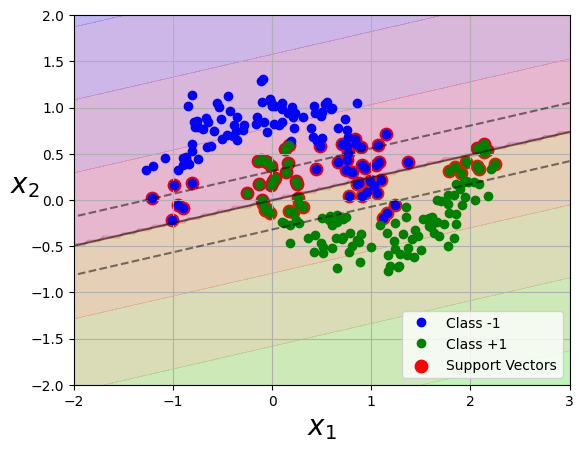

In [113]:
# Test and visualize your SVM model
model = MySVM(C=8.1537, kernel=linear_kernel)
model.fit(X_train, y_train)
print_result(model, X_test, y_test)

# Kernel trick
You would notice that the moon dataset is non-linearly separable, it is a good idea to use some non-linear kernels (kernel trick). You will need to provide the code for the polynomial kernel and rbf kernel below

In [126]:
# Polynomial Kernel (of degree up to and including p)
def polynomial_kernel(u, v, p=3):
    # TODO ...WRITE YOUR CODE HERE...
    
    # K = (1 + <X_1, X_2>)^d slide 8.22
    return (1 + np.dot(u, v)) ** p

# Gaussian RBF Kernel
def rbf_kernel(u, v, gamma=0.1):
    # TODO ...WRITE YOUR CODE HERE...

    # exp(-gamma||x_1 - x_2||^2) slide 8.22
    return np.exp(-gamma * (np.linalg.norm(u - v) ** 2))

## **Question 3**: Try with different kernels and C values and see how the decision boundary changes. Provide **two** plots (one plot per kernel) with corresponding the non-linear kernel type and C value and discuss your finding.

You might need to tune the C value for each kernel.

confusion matrix: [[33  0]
 [ 5 22]]
recall: 0.8148148148148148
precision: 1.0


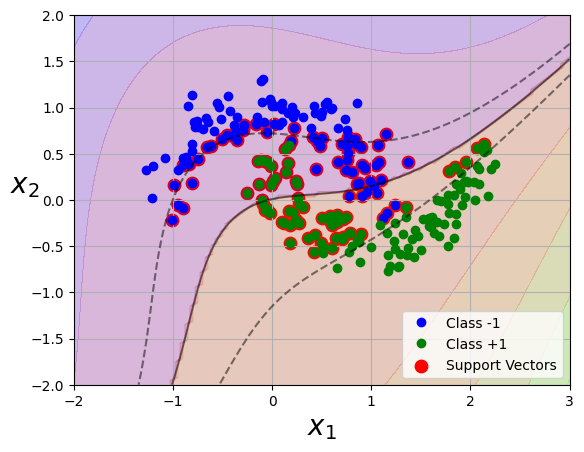

In [158]:
# TODO ...TRAIN/PLOT POLYNOMIAL KERNEL SVM...

# polynomial_model = MySVM(C=8.1537, kernel=polynomial_kernel)
# polynomial_model.fit(X_train, y_train)
# print_result(polynomial_model, X_test, y_test)

polynomial_model = MySVM(C=.015, kernel=polynomial_kernel)
polynomial_model.fit(X_train, y_train)
print_result(polynomial_model, X_test, y_test)

confusion matrix: [[32  1]
 [ 0 27]]
recall: 1.0
precision: 0.9642857142857143


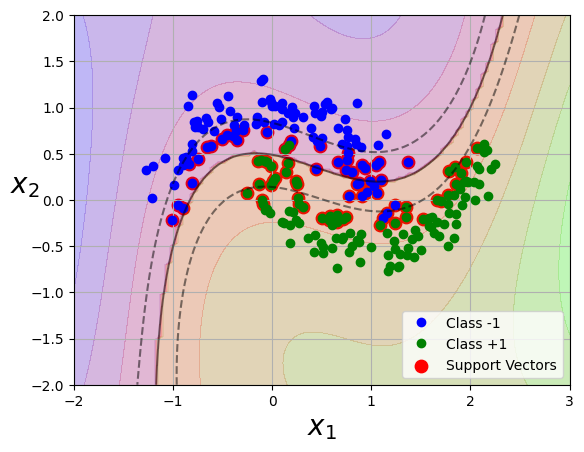

In [150]:
# TODO ...TRAIN/PLOT FOR RBF KERNEL SVM...

# rbf_model = MySVM(C=8.1537, kernel=rbf_kernel)
# rbf_model.fit(X_train, y_train)
# print_result(rbf_model, X_test, y_test)

rbf_model = MySVM(C=38, kernel=rbf_kernel)
rbf_model.fit(X_train, y_train)
print_result(rbf_model, X_test, y_test)

<font color='blue'>
    TODO: replace this cell with your answer
</font>

## Feedback

Please provide us with some feedback on how long each section or this homework overall took you. Any other feedback is also welcomed.

## Submit
Great work! You're all done.

Make sure to submit this Python notebook. See the homework writeup for directions.